In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# GENERATING CLASSICATION DATA
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                           n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

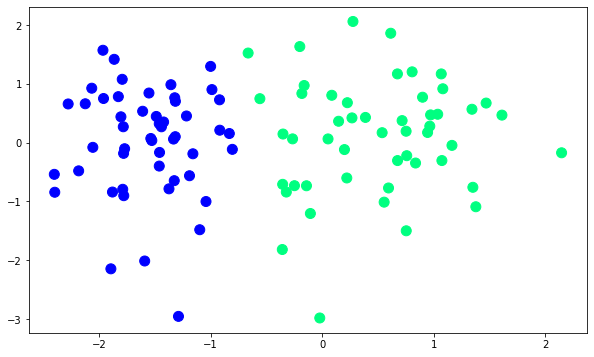

In [3]:
# PLOTTING DATA
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
# CREATING STEP FUNCTION
def step(z):
    if z>0 :
        return 1
    else:
        return 0

In [5]:
# CREATING PERCEPTRON FUNCTION

def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1) #Adding column with values 1 at 1st index position(bias)
    weights = np.ones(X.shape[1]) #Creating weights array with number of columns equal to X array
    lr = 0.1 #Learning rate
    
    for i in range(1000):
        j = np.random.randint(0,100)  #Select a random value 
        y_hat = step(np.dot(X[j],weights)) #Prediction for the current point
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [6]:
intercept_,coef_ = perceptron(X,y)

In [7]:
print(coef_)
print(intercept_)

[1.27474997 0.17842108]
1.0


In [8]:
# values of m and b ---> Converting the equation of line from Ax+By+c to mx + c
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [9]:
# X and Y values for plotting
x_values = np.linspace(-3,3,100)
y_values = (m*x_values + b)

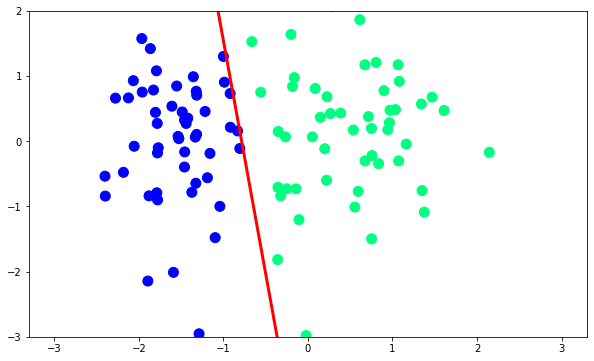

In [10]:
# PLOT
plt.figure(figsize=(10,6))
plt.plot(x_values,y_values,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()

## ANIMATION FOR PERCPTRON TRICK

In [11]:
# CREATING PERCEPTRON FUNCTION

def perceptron_new(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1) #Adding column with values 1 at 1st index position(bias)
    weights = np.ones(X.shape[1]) #Creating weights array with number of columns equal to X array
    lr = 0.1 #Learning rate
    
    for i in range(1000):
        j = np.random.randint(0,100)  #Select a random value 
        y_hat = step(np.dot(X[j],weights)) #Prediction for the current point
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [12]:
m,b = perceptron_new(X,y)

In [13]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


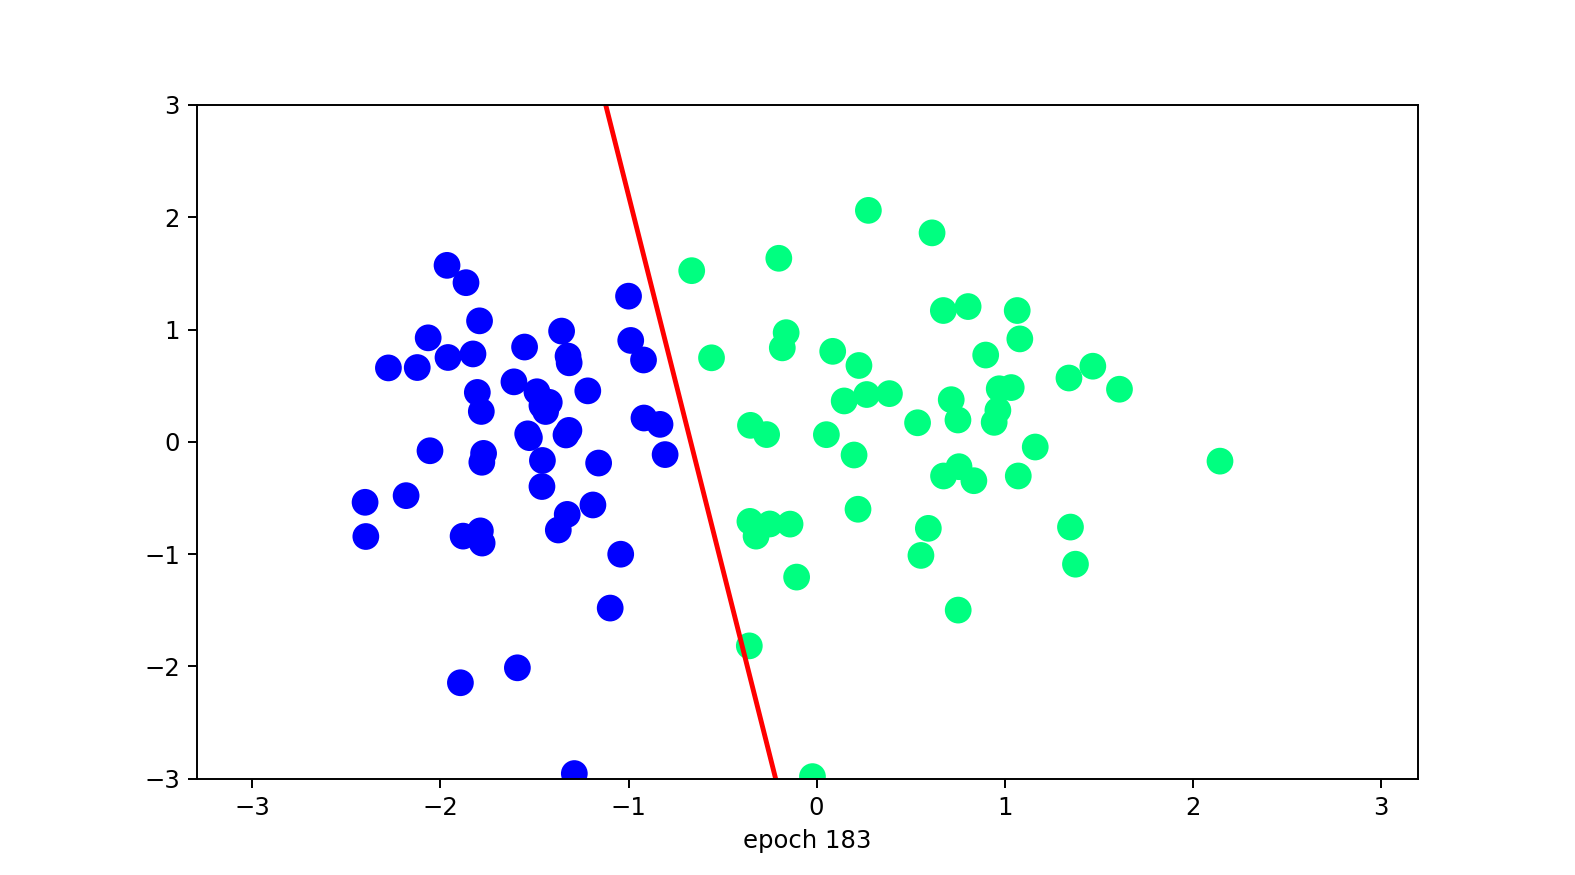

In [14]:
fig,ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3,3,0.1)
y_i = x_i*m[0] + b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i,x_i*m[0]+b[0] , 'r-',linewidth=2)
plt.ylim(-3,3)

def update(i):
    label = 'epoch {0}'.format(i+1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    return line,ax
    
anim = FuncAnimation(fig,update,repeat=True,frames=200,interval=100)
plt.show()